In [ ]:
import os

os.environ["http_proxy"] = "http://127.0.0.1:7381"
os.environ["https_proxy"] = "http://127.0.0.1:7381"


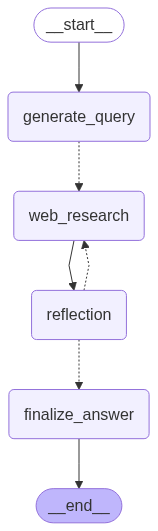

In [ ]:
from IPython.display import Image, display

from search_agent import graph

# draw_mermaid方法可以打印出Graph的mermaid代码。
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
from search_agent import graph

state = await graph.ainvoke(
    {
        "messages": [{"role": "user", "content": "详细介绍GSPO和GRPO的区别"}],
        "max_research_loops": 3,
        "initial_search_query_count": 3,
        "reasoning_model": "gemini-2.5-pro",
    }
)


Retrying langchain_google_genai.chat_models._achat_with_retry.<locals>._achat_with_retry in 2.0 seconds as it raised InternalServerError: 500 An internal error has occurred. Please retry or report in https://developers.generativeai.google/guide/troubleshooting.


In [ ]:
state

{'messages': [HumanMessage(content='详细介绍GSPO和GRPO的区别', additional_kwargs={}, response_metadata={}, id='69f87d6a-c7ca-459d-969e-93bb9b59cfdd'),
  AIMessage(content='', additional_kwargs={}, response_metadata={}, id='929afbe1-2c49-428f-be92-678e0a32f27d')],
 'search_query': ['GSPO meaning and function',
  'GRPO meaning and function',
  'GSPO vs GRPO key differences',
  'GSPO meaning and function',
  'GRPO meaning and function',
  'GSPO vs GRPO key differences',
  'What are the performance benchmarks and empirical comparisons of Group Sequence Policy Optimization (GSPO) versus Group Relative Policy Optimization (GRPO) in fine-tuning Large Language Models, including metrics on training efficiency, model stability, and task-specific performance?'],
 'web_research_result': ['GSPO is an acronym that stands for different concepts depending on the context. The most prominent and functionally detailed meanings found are "Group Sequence Policy Optimization" in the field of artificial intelligence

In [ ]:
from IPython.display import Markdown

Markdown(state["messages"][-1].content)


好的，GSPO和GRPO这两个缩写在不同领域代表着截然不同的概念。最主要的区别体现在大语言模型（LLM）的训练算法领域，此外，在企业资源规划（ERP）系统（如SAP）中，GRPO是一个常用术语，而GSPO则有其他不相关的含义。

### 在大语言模型（LLM）领域的区别

在LLM的强化学习训练中，GSPO和GRPO是两种不同的策略优化算法。GSPO（Group Sequence Policy Optimization）是作为GRPO（Group Relative Policy Optimization）的改进版本被提出的，旨在解决GRPO在训练，特别是训练混合专家模型（MoE）时遇到的不稳定性问题 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==)。

#### GRPO (Group Relative Policy Optimization)

GRPO是近端策略优化（PPO）算法的一个变体，其目标是减少对价值模型的依赖，从而提高可扩展性 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=)。它的核心思想是直接比较模型针对同一提示（prompt）生成的不同回答，并将优于平均水平的回答作为学习信号 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==)。

*   **核心机制：词元级（Token-level）优化**
    GRPO在计算重要性比率和应用梯度更新时，其粒度是**词元级别**的 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==)。这意味着在一条生成的回应中，每个词元（token）都会被独立计算一个重要性权重，并独立进行梯度裁剪 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [xugj520](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHWs6G6udJ7yMkT95Exl5-_c_KPAh8uhxEnpNgB1FQ6_busmOxn_80HqRw_JPlHtg7LGkPUWgY8e5Q9SzIfT2-o1huaIM1Zmme40nTta4cj5xeoVhV3l4gXSvTkODmUcxKQk7OzA7x4e4gXB32ZQh0sauRi)。

*   **主要缺点：**
    1.  **高方差和不稳定性**：由于每个词元只被采样一次，词元级的更新会导致梯度估计的方差很大，训练过程非常不稳定，尤其是在处理长序列时，模型容易“崩溃” [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHZ8LmkgklAG8AK9Spfvb8za3GB_7cyKm59l9wiJbwr6TRKVvR_PkxONIK6kUlRtIZeR3VBHkWq4qtufcSoVZ6o3ChFeOZl33Yq79b8FIYMk24YNaNfbk-bPGsr5S7afACZo84YJEyZB8HDeEJhJ9QZV7ozoE4=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==)。
    2.  **与奖励信号不匹配**：LLM的奖励信号（如人类偏好）通常是针对整个生成序列的，而GRPO试图在词元级别进行优化，这种粒度上的不匹配会引入噪声，降低训练效率 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFoyK2Mfspdchk4REBYl081vy1rq6pTGxs_m1tpY4dNbwA8X4GR2MkIqUFoAY497Ch0B9NKjDJus3qqjjVBuAjXdb-DYnxN4nmyv6xtbjkd3X7qmMzq1BcJ0j_EeQ8e-lEgvoemdbtH_qjKqqXRem-wd-UuNPZyck2M3Qdmn1bvptDC0NgcP_W_kB4V7l4QMachoQ7tcKKiTYiftYR0hKohe-dPNhi5-Q==) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHdjgT8Ux7wks764Z8b8AFulGoyY20SPkHz3Y64wQZ6Kr_gbw3GYkM6nj1Lvci8RN2N1j-n0jZQefCRG2hGbl9btE82BrXGP88sBjZY9T8hcflZbTiD4M5mlMjhThjNaOkoIx3ksw==) [substack](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHI3Zmrn2F3sn9kco1MNIDnLeV8ImVa97vecPC_osCNUaiom3-Iaaugy7TWTxSMy6dAaeW4dvEv3HPh_ouH0jMdHP1ZkKML2cqEM6ZLnARxasD_6CRsYKH2iAUN0KKgcqeIAgfWjaPRZ7VzVd268vOz5f1cpt0Ce41ErrqRww==)。
    3.  **MoE模型训练困难**：在训练混合专家（MoE）模型时，GRPO常常需要依赖“路由回放（Routing Replay）”等复杂技巧来防止专家“崩溃”，这增加了训练的复杂性和开销 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=)。

#### GSPO (Group Sequence Policy Optimization)

由Qwen团队提出的GSPO，旨在从根本上解决GRPO的上述问题。其核心创新在于将优化的粒度从词元级别提升到了序列级别 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=)。

*   **核心机制：序列级（Sequence-level）优化**
    GSPO为**整个生成序列**计算一个单一的重要性比率，而不是为每个词元单独计算 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==)。因此，在同一序列中的所有词元共享相同的梯度权重和裁剪决策 [xugj520](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHWs6G6udJ7yMkT95Exl5-_c_KPAh8uhxEnpNgB1FQ6_busmOxn_80HqRw_JPlHtg7LGkPUWgY8e5Q9SzIfT2-o1huaIM1Zmme40nTta4cj5xeoVhV3l4gXSvTkODmUcxKQk7OzA7x4e4gXB32ZQh0sauRi)。

*   **主要优点：**
    1.  **显著提升稳定性**：序列级的更新方式提供了更平滑、更可靠的学习信号，从根本上减少了高方差和结构性噪声，使训练过程更加稳定 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==)。
    2.  **提高训练效率**：由于学习信号更清晰，GSPO的训练效率远高于GRPO。在达到同等性能的情况下，训练时间可缩短30-40% [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHZ8LmkgklAG8AK9Spfvb8za3GB_7cyKm59l9wiJbwr6TRKVvR_PkxONIK6kUlRtIZeR3VBHkWq4qtufcSoVZ6o3ChFeOZl33Yq79b8FIYMk24YNaNfbk-bPGsr5S7afACZo84YJEyZB8HDeEJhJ9QZV7ozoE4=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHdjgT8Ux7wks764Z8b8AFulGoyY20SPkHz3Y64wQZ6Kr_gbw3GYkM6nj1Lvci8RN2N1j-n0jZQefCRG2hGbl9btE82BrXGP88sBjZY9T8hcflZbTiD4M5mlMjhThjNaOkoIx3ksw==) [substack](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHI3Zmrn2F3sn9kco1MNIDnLeV8ImVa97vecPC_osCNUaiom3-Iaaugy7TWTxSMy6dAaeW4dvEv3HPh_ouH0jMdHP1ZkKML2cqEM6ZLnARxasD_6CRsYKH2iAUN0KKgcqeIAgfWjaPRZ7VzVd268vOz5f1cpt0Ce41ErrqRww==)。
    3.  **简化MoE模型训练**：GSPO的稳定性使其能够直接稳定地训练MoE模型，无需依赖“路由回放”等额外技巧，简化了训练流程 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==)。

#### 核心区别总结 (LLM领域)

| 特性 | GRPO (Group Relative Policy Optimization) | GSPO (Group Sequence Policy Optimization) |
| :--- | :--- | :--- |
| **优化粒度** | **词元级 (Token-level)** [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) | **序列级 (Sequence-level)** [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) |
| **重要性比率** | 为每个词元独立计算 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) | 为整个序列计算一个统一的比率 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) |
| **梯度权重** | 每个词元有独立的梯度权重 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) | 同一序列中的所有词元共享相同的权重 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) |
| **训练稳定性** | 容易不稳定，有模型崩溃的风险 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) | 稳定性显著提高 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==) |
| **训练效率** | 信号噪声大，计算资源浪费较多 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) | 训练效率和最终性能更优 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQExrzdK3cOD52ybNpNSKM9jf5nIhvtJmYUDGohwqc2Yu2bQe0iAtwhQh4G629O6fQWSs8_R5PJyK1IKvYsQS97r3coHskxGW7-Fv06zUlG9xiRzsc0lK-sXRrQw7a7C43vH9zg8sdH8bOd_NKL7EK440BskCpLVEELyiNGrAjdC8_G_rJ8Nip14YJr3HCdDmiEEmTaL8EVqbx_DblF2gVKtpgbc3IMEsw==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE_KL1hB-xjwSJGpIMxV5jBvzIOO8xhauSbIjHMV13d7qspMeZk3hGb6MP_lpIGvanP1VOZwpWt-cnI3fieTJXqORxp9PVhvAVaiFcIYFg8GmFio9OcEG30iitzJa26opbIhXSZjg==) |
| **MoE模型处理** | 通常需要“路由回放”等额外技巧 [huggingface](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFeOeYMQBC8jmg4B17zjoZqj_DJDzM2UGetvBqbjXM5-KV_ZH8Qo11L99VRkv-rieMiBp9y-o93gqlGuiTQewGz_MluCJX-e2U8_wa8E3XjhrcEBTRX0DqSksusk7OHrswYEEiVCx-MnQt-Gc_tdN1fq6hWXrg=) [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) | 无需额外技巧即可稳定训练 [medium](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQH4QinMvsOsYMchPKgxJ--jrTfv5S5aMAYHslKR3gXWIAyBTa_8_o-TYCCCejuhPBicpjm2Fm46JGxP_Htfa-sYXjO-Yv2ZP_ALAM6ayhSWfzNupeYPoJTn3a7xgnzXIyEJhn9y-yDKfEk5KEve58r3WF8EMQj-8N6iNNJO80ZkngGxykokBLlkW7dMXoaewqFgvTH_p4icMHzOCopIk6HuAhB2jpB017pvafTou8JESA==) [github](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFzbDFTFDR2hTN2qRyiylI8j6wVqWp783w8zpfF5MCN-kPzI_Am_Lbg0cnbcyZektdfts9XKmtb8tEh5LlryB3_JtodnRS3LwylEYPQ4igQ8cpXhduvuLMEBZlEPU0=) |

---

### 在SAP及其他领域的区别

在商业和运营领域，这两个缩写的含义完全不同，且不存在直接的可比性。

#### GRPO (Goods Receipt Purchase Order)

在SAP Business One等ERP系统中，GRPO是“**采购订单收货**”的缩写 [sap](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQFFLFFx8909Y9YytM_-s_WuPkngIMvTZKfae5LoHJ0pJ4uRHV2g6MNWvPgaXabEfdAW1wCHHJzrwgzU2SJ-mDvn-pNYFlZvQq9QJXsjn7HqstxDrZ4ZgSZYwQmJmoBdLGA3ByDRreHyIAKnQZ_U7ZqKpGWFzX-DMsb7bPyXQklJr_DeozTgZITBgyzg9j0Kyc1Ckw==) [reddit](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHgmZZAgNI8o_qRT4Y9FzMO2sbi9-0Q5-_3WXknA1ScggxGYFNCzmSKizVRONP0Alw8FLCaJVFesxQtbA9u2Nn1pL3UaXolxQvV0k4De5mdzC4dsZ6fq28aC8i0PhkjC_Sfbmau6oQOO6p4TsUI3BEuR70oLttK3-JvhfTSK4LG99Po85TqJo7RnSkZrTzO2hTsbbGmzL-uHQ==) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE87G5bP1Rk6uHYh6_u0ZQMaBpqZeGNzM2stw_79HZlbjGTjhIOXV9YZSoDeKcStH6kz1x7_Gg0xsTVLK47sMcaQsEcOAcWDSaFTCk-a6mkmkusN_xYU-RLZ1YEyGuI4J14Z2gFdw==)。这是一个关键的业务交易，用于记录企业从供应商处收到了根据采购订单订购的货物 [emerging-alliance](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=1)。创建GRPO会更新系统的库存数量，并可能触发相应的会计分录 [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQE87G5bP1Rk6uHYh6_u0ZQMaBpqZeGNzM2stw_79HZlbjGTjhIOXV9YZSoDeKcStH6kz1x7_Gg0xsTVLK47sMcaQsEcOAcWDSaFTCk-a6mkmkusN_xYU-RLZ1YEyGuI4J14Z2gFdw==) [emerging-alliance](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=1)。

#### GSPO (其他含义)

与GRPO在ERP系统中的明确含义不同，GSPO没有一个统一对应的商业术语。它可能指代以下完全不相关的事物：
*   **Guidelines for Safe Pool Operation**：澳大利亚关于水上设施设计和运营的国家行业标准（安全泳池运营指南） [royallifesaving](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=2) [royallifesavingsa](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=4)。
*   **组织机构名称**：例如金州流行乐团（Golden State Pops Orchestra）或研究生物理组织（Graduate Students Physics Organization） [thefreedictionary](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=6)。
*   **经济学术语**：在某些经济讨论中可能指“州生产总值”（Gross State Product） [thefreedictionary](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AUZIYQHL5QUcy6Z38KcttkKgP9z8MZoQAcU2Z565NGDka6zMw5VKZNk5SdwjCBHEcO7wEF6rC7uKSF73P21ysEgALXd_g7nssri2b6rmaJtSull6uuEPJ34-1sN6lu6yVRyPgRo=6)。

因此，在讨论GSPO和GRPO的区别时，必须首先明确其所在的上下文语境。在LLM领域，它们是两种技术上迭代发展的优化算法；而在其他领域，它们则代表着风马牛不相及的概念。

In [ ]:
state = graph.ainvoke(
    {
        "messages": state["messages"]
        + [{"role": "user", "content": "How has the most titles? List the top 5"}]
    }
)


In [ ]:
Markdown(state["messages"][-1].content)

Based on the number of UEFA European Championship titles won, Spain holds the record [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGCVmrxZzE4ELt_Nl2fd2hYXp7QBGE7bqB8y4I0CRyiGrIB4dMu7krUBEuukEN1Go8KCJme8GuKl3dNqiW-UD7oR6MNWR47NKy1wqoNBxzrgZ2q1nnmjCAqxSeNejx_KTeAkiRVjUBXOQApJL_gUDI4Lwl3BCGcmlNVZGcuP88YN09iuu_stghqGJ7ulc6rUpHEZy9w0SpxUzexpKo27306oSXBPvvYVX6VnltFWvASMRsDfmD3dc94t715Ig04wFvaSIicHg==) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=).

Here are the top countries ranked by the number of UEFA European Championship titles:

1.  **Spain:** 4 titles (1964, 2008, 2012, 2024) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXGCVmrxZzE4ELt_Nl2fd2hYXp7QBGE7bqB8y4I0CRyiGrIB4dMu7krUBEuukEN1Go8KCJme8GuKl3dNqiW-UD7oR6MNWR47NKy1wqoNBxzrgZ2q1nnmjCAqxSeNejx_KTeAkiRVjUBXOQApJL_gUDI4Lwl3BCGcmlNVZGcuP88YN09iuu_stghqGJ7ulc6rUpHEZy9w0SpxUzexpKo27306oSXBPvvYVX6VnltFWvASMRsDfmD3dc94t715Ig04wFvaSIicHg==) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=). Spain is also the only nation to have won consecutive titles (2008 and 2012) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [nbcsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHgdp86b29MgI2_Kvo4j5P0Iz8d3W8YgVkRwx31hZAoC9_dL-zyj_jP1vbDkxBiCA8kYArwSMPRVetYZR9WYYAwm3VwowkVtH7slpfObvQLnlHb2SQ386cBdZeZBZmEhgvVFE07YR4Z83RgohnOi26cW1BsZiRYlm1Adh1pgWtiNeiUl7ZNUMxtMQ5XvBx0GM1FpBd1QPsnhjU-pwNz-7ETG_XhsC7ocHEgWyMozF0cJOsEoR-Uye62Q0M=).
2.  **Germany:** 3 titles (1972, 1980, 1996) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [yahoo](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEN_wi1zong77ArtYg3CR5q-wmd_1KK_G72jrRoZv8_QlUFZUvjqyDXL5Co8RzGzWRzP9To5pq0kSBorMh3qgNVcOLGuCbF3giTuegc9yb0k9JqiOTFNYINKJQNAAmMo2ZziC5Iu_F1S5cpLJkKgCXLKk3VLkhqY-hSV1h_ryZRIMjENlsw7Q0=) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXETMGJq-qIccM3rUu2XPme69mRXj51ItevakpVZcxWa26F74sDgeP3slSuSCccKFyv9Xx5P1r4-3kY4ckWQclfnA3leE1ctTGdnIn-5GBRQrjxIwNSlKADP46pBTqgg_LhybRo2at4=). (Note: The first two titles were won as West Germany) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [byfarthegreatestteam](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHbs0yJwq86sGLUvo-8IgZfAus8ZnQcTe_dDlaZhfp7awMYMvU3mq8EL4VYyYWhahCYeRlACi-5eOq4maub0x3GsfKHvhgLBe8KOJG7f-CaPLRKjmRFPRNS2sig2ZCw6VXQeyLq_JWgmbIof5uLvNFqs_qOwFwqZvSmqWKbEnrw2dXMdEmsLKprFbsvAwd9GdMzFr9HojBPpSSk95SzVt2a849gqAGFyIq89tv-mirQaMRqwVUL).
3.  **Italy:** 2 titles (1968, 2021) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [foxsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXF2tzG9OJk8Y6nPflMmiUEr826naRNP0ncayg9rczFwi4d_IOq9k99b_7K4ISJPMpAOTzV_VCw8H33rEC6z2N99GWxlB7evrGw__IwY8ZILaE4kYzojFvnmrvRwEdAQsRU2xkUH2AM_VDc6bXduEQBjjkHRi1XFwuY5OvVbGImLznn0dEidu45aQ0Kq) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=).
4.  **France:** 2 titles (1984, 2000) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [youtube](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXETMGJq-qIccM3rUu2XPme69mRXj51ItevakpVZcxWa26F74sDgeP3slSuSCccKFyv9Xx5P1r4-3kY4ckWQclfnA3leE1ctTGdnIn-5GBRQrjxIwNSlKADP46pBTqgg_LhybRo2at4=).
5.  **Tied with 1 title each:**
    *   Soviet Union (1960) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Czechoslovakia (1976) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Netherlands (1988) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Denmark (1992) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Greece (2004) [olympics](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHoAXOG7_3DUjYvRr_buN8IAL3xE5yQoPetZCb1KlcaMOgJEE5BeBoqQEVVkDZLDpwgTmFkPYeWS7i_D23Vd5bKzUTfc0HSLI481VbXjMD9ECeZRFZ17g3xAYLg5I0QU34RWLCRcV_zgphUsJZ0L5gXjpYz5gl8syuYAX3VkHCwh0x6Wqau4er_cZ56CoiA-3S_r2I=) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)
    *   Portugal (2016) [sportsadda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXEYq2a0benYn0vF2WrfvmqEsgwriQ08aVcDdpS1MUjBxlzaV_scV0ldVeUpwqcgVLCfxgX3oVmbUxbkFPzeHbknsAbxLFk4Iyvtxgacx54AZBnL1szGQ9cQQGOOT8f-zGZhzKWEhAIOYTsz89uAr55R546MlC31OFXiU7AGhMgLi0Ekk6wQvPJVTWs_TiaG4MHoHo0obaRhJK1iPYaAxqHKD2Zf5rTr2jmdPBPd9w==) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFvGr1KOv5qWkUO63kL5-QFEKn41IArXdrcLcMuaCc69bmwu_VsGzE7QI4scHdLjQxYxoFD3eg4ZflqzFcnNk7UJKM5cT8IR13LrrWodcNzotVidnczmVCFCd1-w10ixHS2rgykLdSr8UqFNJ88T2hZL-HL6YCLUUAXJjFP) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXG_0rXuWu0vsaIzCzaUG9Rw0L65I3o3RWhCp4gzXiHDZW3GaJXLntEQNi-O88mGf5LlE0tAkMNd_5VBNOkzIxAkbVsdkpPjwtzuY1sjv2gjtHLnvbIa8Y9jFbdS8kE3xqj95_TayzxNWpyr-XkwY9qLW4NI) [wikipedia](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFXDSskdzRBS66rtxun9egUAz7spzUcDjq30yCoOdFr_SzKkrXBLgAPbzZKVQhx-Z28pOO3phMnr-qIhLuS9zJrp0MTCyIohI6EYxlJ3DpFXTNxneDn9OzNs7sZX_LwKKYA2E-7Mjr46dqZuprKzRn9amiPHusHo3dRWKpOzMSfhXpO) [topendsports](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXHD7IG-bFCCNoc-2iRxXvo468klJLjiQmPdQCkRubtvT83i-Xbpg5XKxyLQB9Yc7qVwRuLjHIB37ywnZ8fdT3fM2ydpLggvdTGxAUVL1M0havCvEQpxiqcmS9LaBnOqWnMOWyy_ztdfTrVihPRb0chKtGeDHA-2EMQlW9ge) [sportingnews](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFAkEqJsPiiUSSUWhHm2Qtc30qed2JljSZ9Nu4JrcJ--CkX_Rif1AO5L0Kxl09j6yo8n5MS9NWdFsXi7KRIg5EJL0d0jm8YA-E4sllbJojNNQDwII8cb1A3b9b5RP3JoFTp2xEYQu914rrEFmRmjsFb44LU8bgGFJijrBG237B67YqLXiQThCPZjP-Gq3BKv3cTxZKseIXSRjaxosiM4LDpxDxZPAdpeIIpb3aiH7w_IyC8dWXpCyoHZYZfYe6EGNXfkmE=) [sportskeeda](https://vertexaisearch.cloud.google.com/grounding-api-redirect/AbF9wXFIIs54t2O4RL3Y8cvfgbTs_CjcMeedsitpXc8PsaUZXOA7sohYdYTdTiN1-kLAhtXi2UZT4A-iIPZ6ufIpvuD_53Qtr4zqZnqZ6ox74EgyOPyjxs9k1qS_Gq1kR57IdjnMG4JbC7y9nVq2xZRNevSC-PJLSfCoLc36ahu6Xp6Fssl1Yw8LjgX2ranBbG72OvyijpJj1UygG-SVqr7h0y-DECQ=)

Therefore, while Spain has the most titles, the top 5 ranking positions are held by Spain (1st), Germany (2nd), Italy and France (tied 3rd), and the six nations tied for 5th place.